In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures



In [2]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [7]:
data.describe(include='object').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [8]:
c = ['Id','Alley','Street','MSZoning','LandContour','Utilities','LandSlope','Condition2','Condition1','BldgType','RoofStyle','RoofMatl','MasVnrType','ExterCond','BsmtCond','BsmtFinType2','Heating','CentralAir','Electrical','Functional','FireplaceQu','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

data.drop(columns=c, inplace=True)

In [9]:
imp_mean = SimpleImputer(strategy='mean')

C_columns = data.select_dtypes(include=['int64']).columns

data[C_columns] = imp_mean.fit_transform(data[C_columns])

In [10]:
C_columns = data.select_dtypes(include=['float64']).columns

data[C_columns] = imp_mean.fit_transform(data[C_columns])

In [11]:
imp_mode = SimpleImputer(strategy='most_frequent')

C_columns = data.select_dtypes(include=['object']).columns

data[C_columns] = imp_mode.fit_transform(data[C_columns])

In [12]:
d = data.select_dtypes(include=['int64', 'float64'])
d.isnull().sum().sum()

0

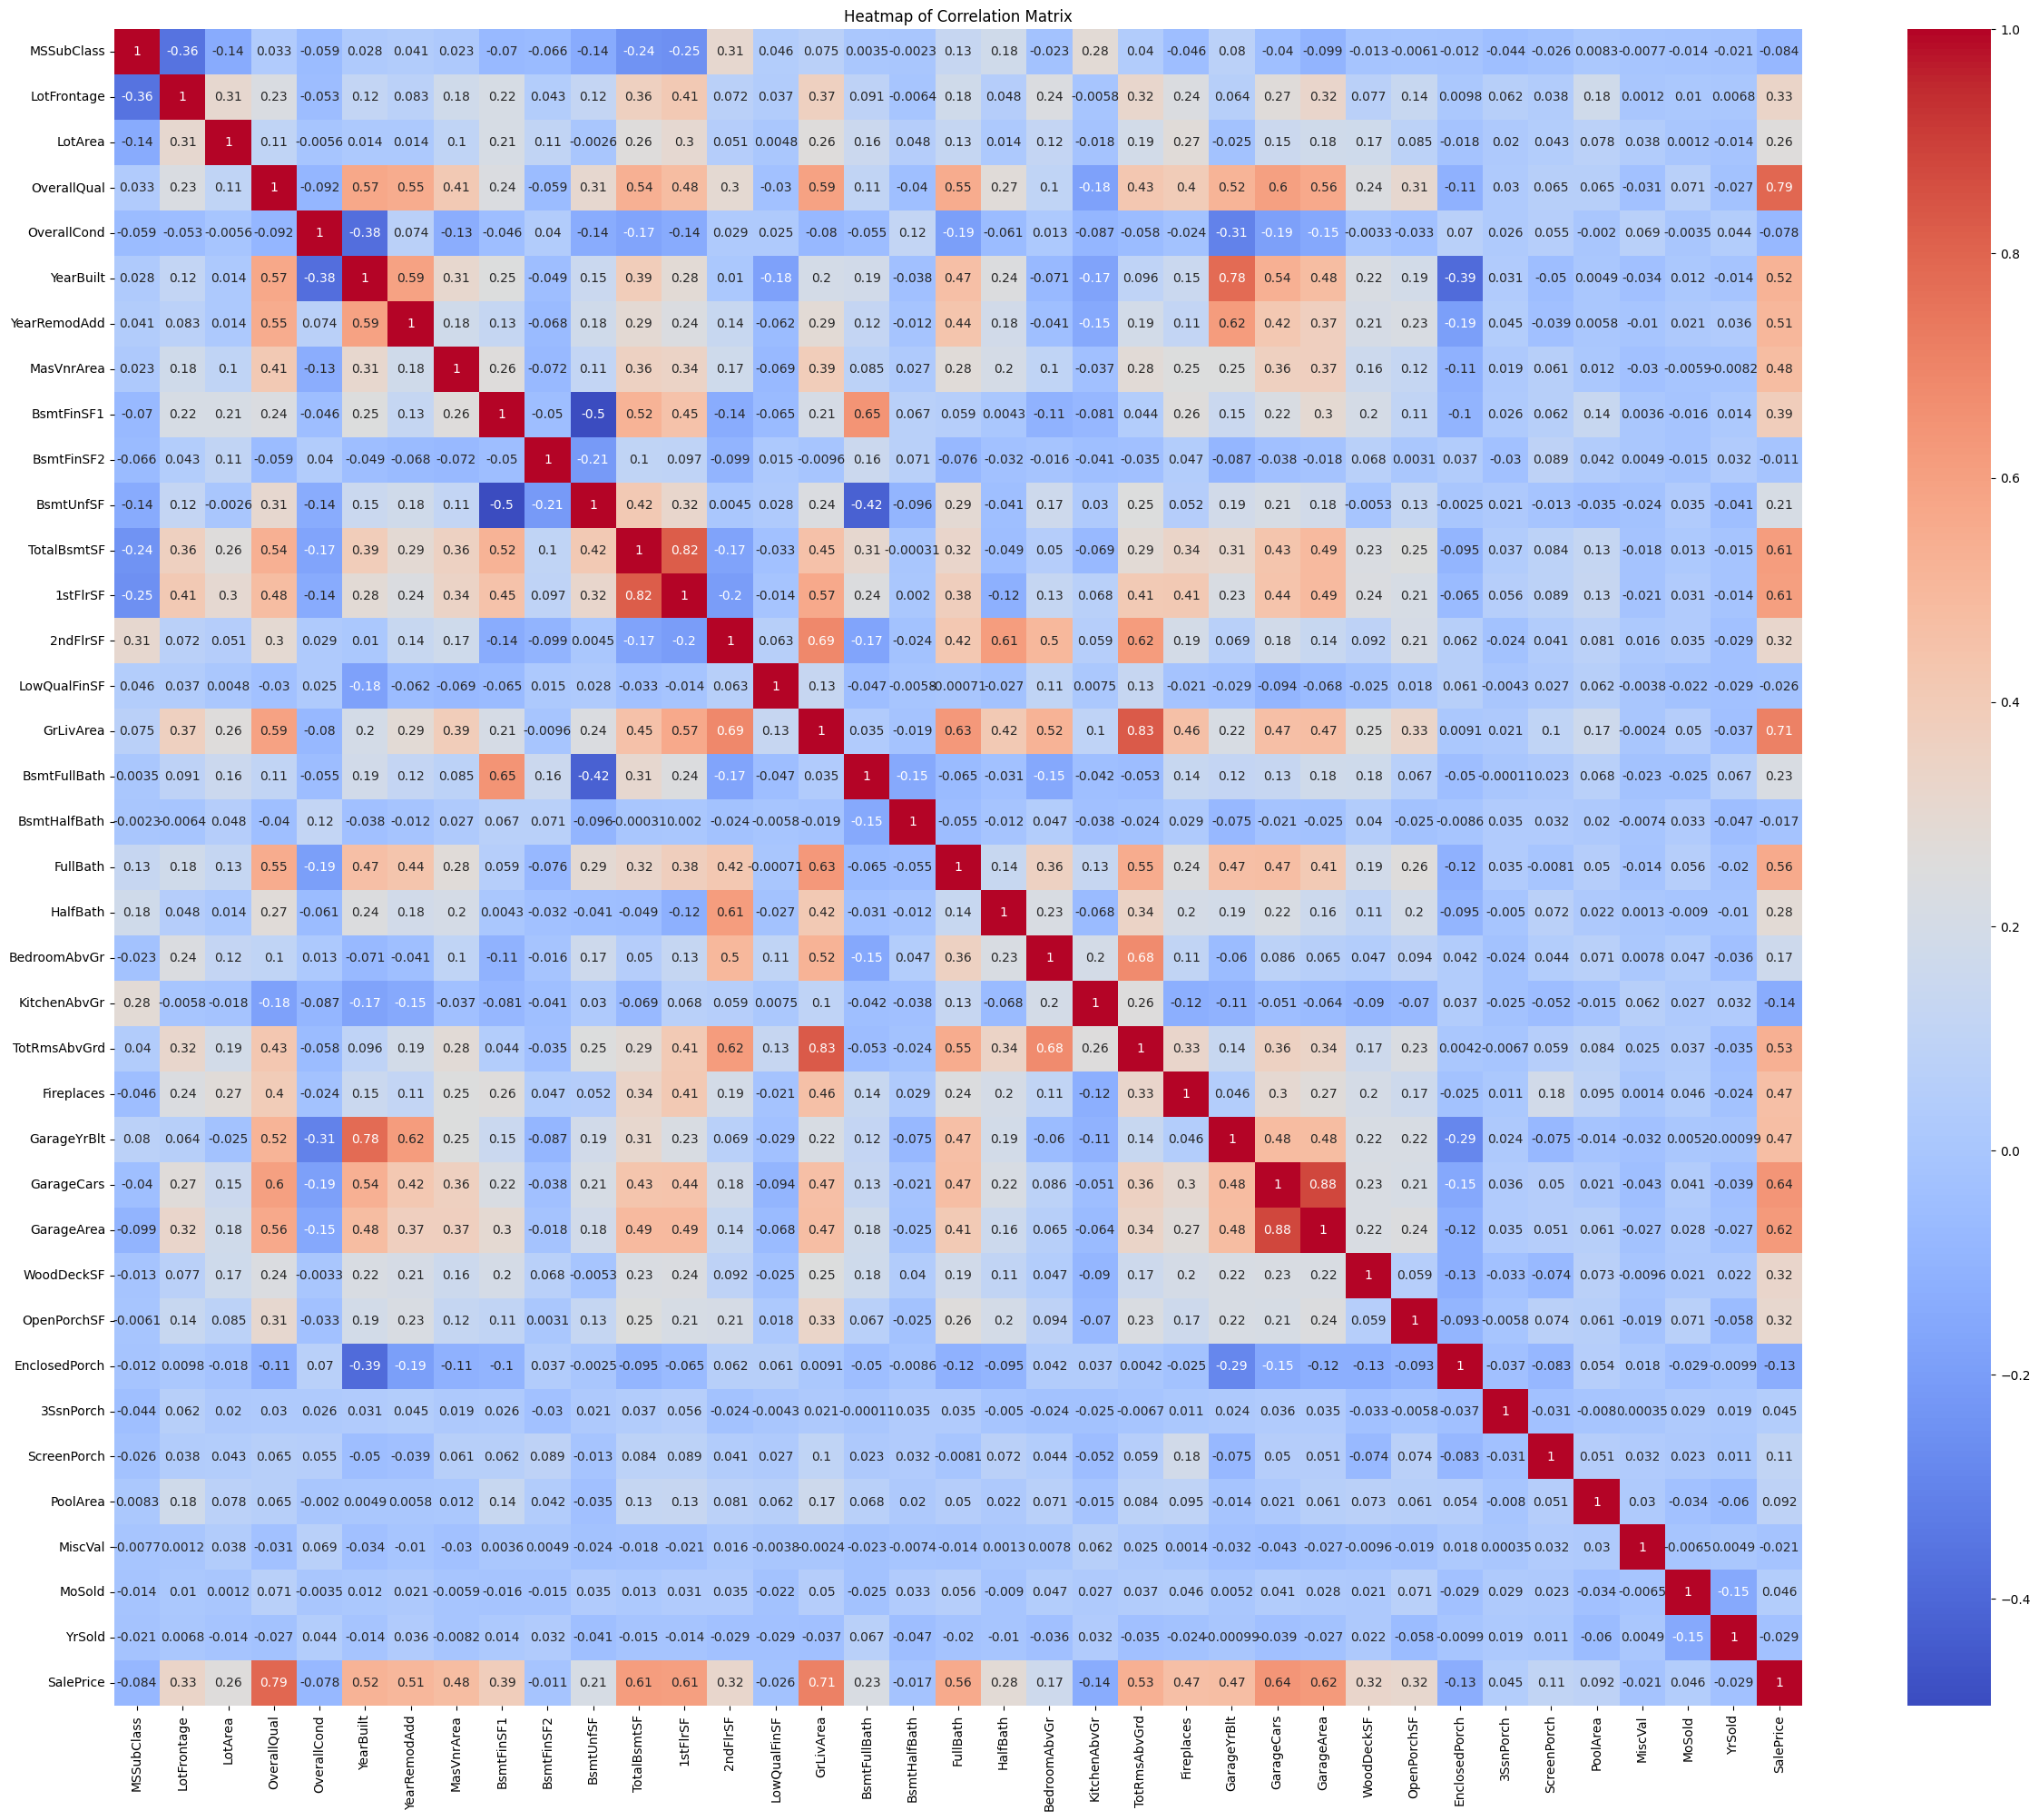

In [13]:
numerical_data = data.select_dtypes(include=['int64','float64'])
corr = numerical_data.corr()
plt.figure(figsize=(30, 24))  
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap of Correlation Matrix")
plt.show()

In [14]:
c2 = ['OverallQual','YearBuilt', 'MasVnrArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GrLivArea', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'GarageArea']

c = ['MSSubClass','LotFrontage','LotArea', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

data.drop(columns=c, inplace=True)

In [15]:
data.columns

Index(['LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'TotalBsmtSF', 'HeatingQC', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [16]:
data

,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,MasVnrArea,...,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,SalePrice
0,Reg,Inside,CollgCr,2Story,7.0,2003.0,2003.0,VinylSd,VinylSd,196.0,...,1710.0,2.0,Gd,8.0,0.0,Attchd,RFn,2.0,548.0,208500.0
1,Reg,FR2,Veenker,1Story,6.0,1976.0,1976.0,MetalSd,MetalSd,0.0,...,1262.0,2.0,TA,6.0,1.0,Attchd,RFn,2.0,460.0,181500.0
2,IR1,Inside,CollgCr,2Story,7.0,2001.0,2002.0,VinylSd,VinylSd,162.0,...,1786.0,2.0,Gd,6.0,1.0,Attchd,RFn,2.0,608.0,223500.0
3,IR1,Corner,Crawfor,2Story,7.0,1915.0,1970.0,Wd Sdng,Wd Shng,0.0,...,1717.0,1.0,Gd,7.0,1.0,Detchd,Unf,3.0,642.0,140000.0
4,IR1,FR2,NoRidge,2Story,8.0,2000.0,2000.0,VinylSd,VinylSd,350.0,...,2198.0,2.0,Gd,9.0,1.0,Attchd,RFn,3.0,836.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Inside,Gilbert,2Story,6.0,1999.0,2000.0,VinylSd,VinylSd,0.0,...,1647.0,2.0,TA,7.0,1.0,Attchd,RFn,2.0,460.0,175000.0
1456,Reg,Inside,NWAmes,1Story,6.0,1978.0,1988.0,Plywood,Plywood,119.0,...,2073.0,2.0,TA,7.0,2.0,Attchd,Unf,2.0,500.0,210000.0
1457,Reg,Inside,Crawfor,2Story,7.0,1941.0,2006.0,CemntBd,CmentBd,0.0,...,2340.0,2.0,Gd,9.0,2.0,Attchd,RFn,1.0,252.0,266500.0
1458,Reg,Inside,NAmes,1Story,5.0,1950.0,1996.0,MetalSd,MetalSd,0.0,...,1078.0,1.0,Gd,5.0,0.0,Attchd,Unf,1.0,240.0,142125.0


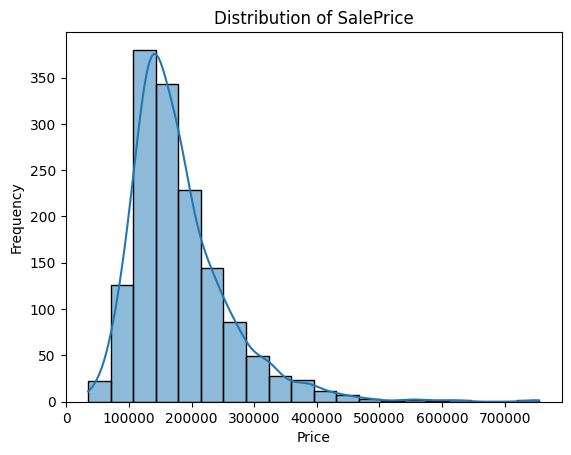

In [17]:
sns.histplot(data=data, x='SalePrice', bins=20, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

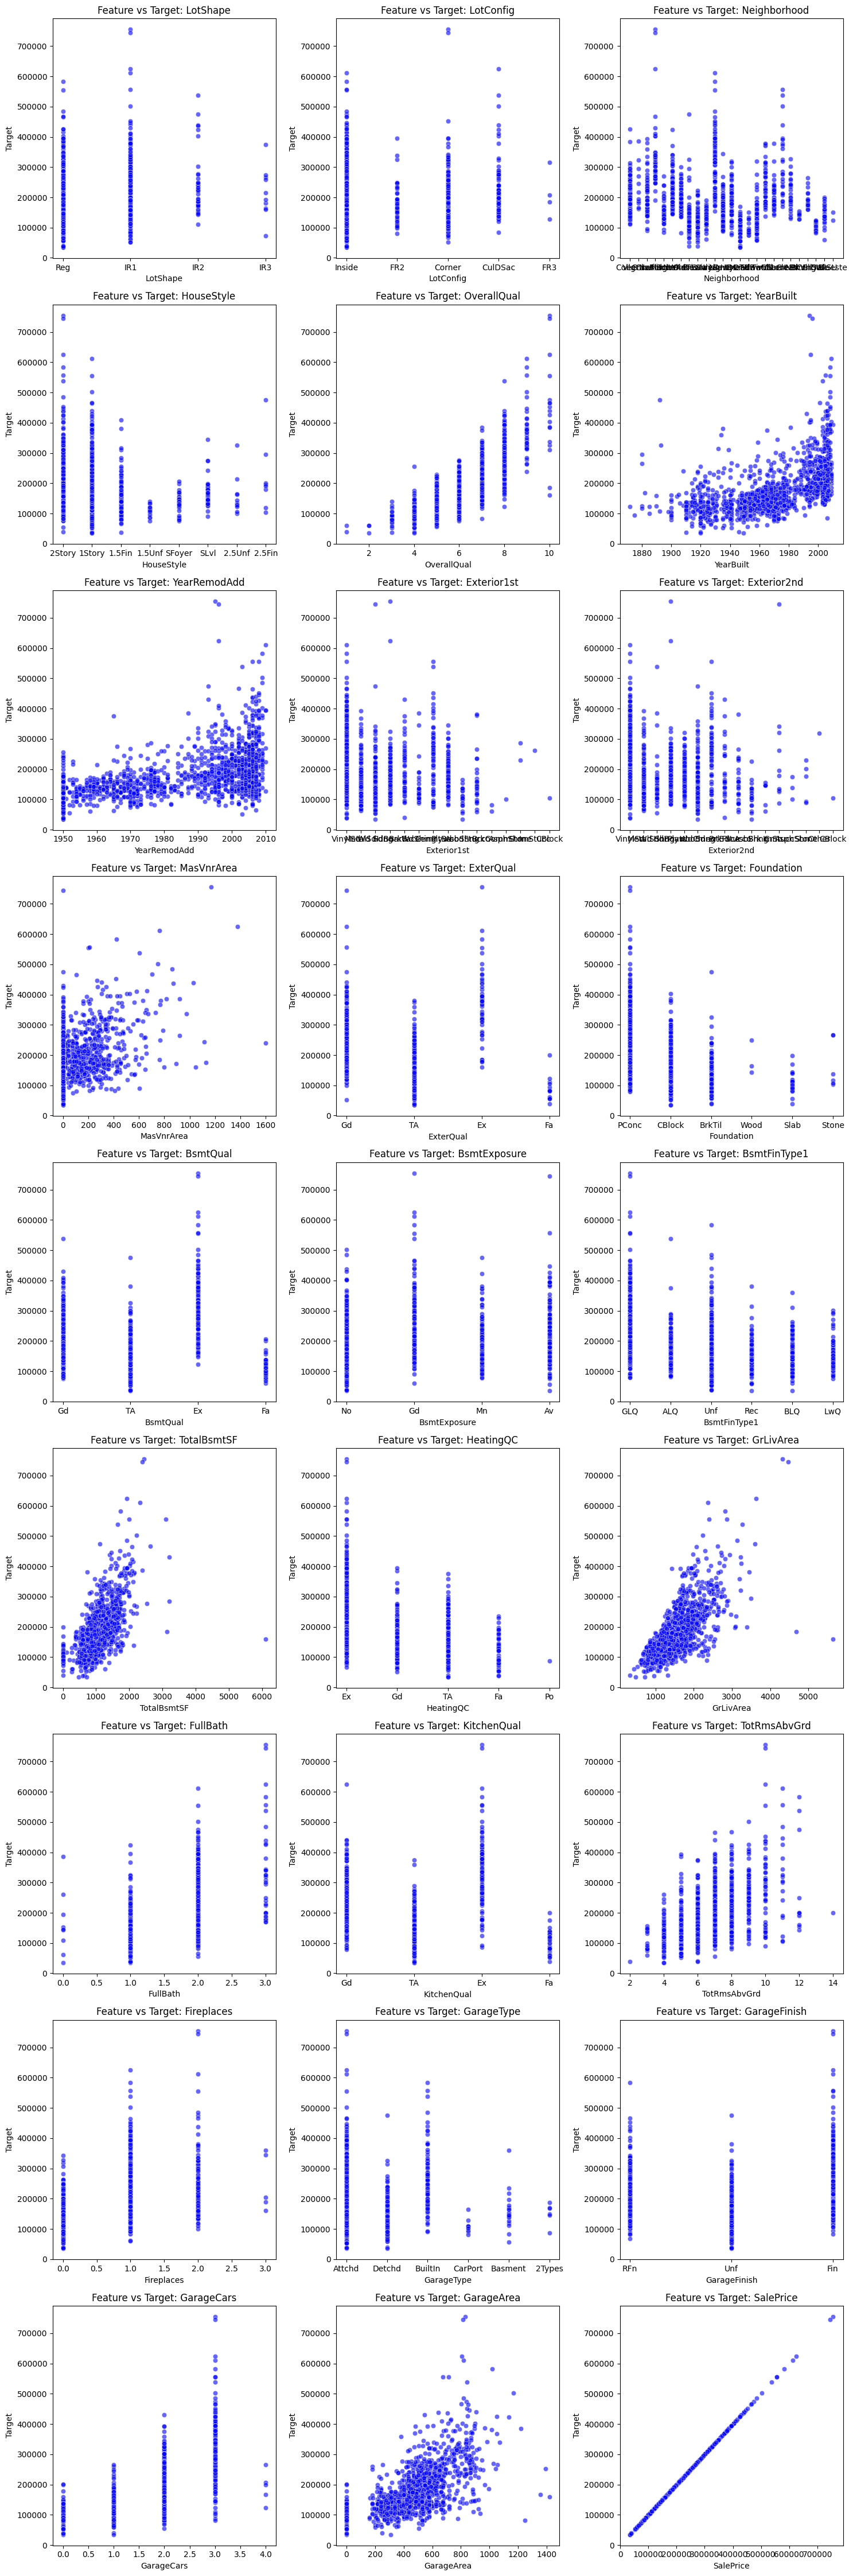

In [18]:
features = data.columns  

num_features = len(features)
num_cols = 3  
num_rows = (num_features + num_cols - 1) // num_cols  

plt.figure(figsize=(15, 5 * num_rows))

for i, feature in enumerate(features):
    plt.subplot(num_rows, num_cols, i + 1)  
    sns.scatterplot(x=data[feature], y=data['SalePrice'], color='blue', alpha=0.6)
    
    plt.title(f'Feature vs Target: {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Target')

plt.tight_layout()

plt.show()

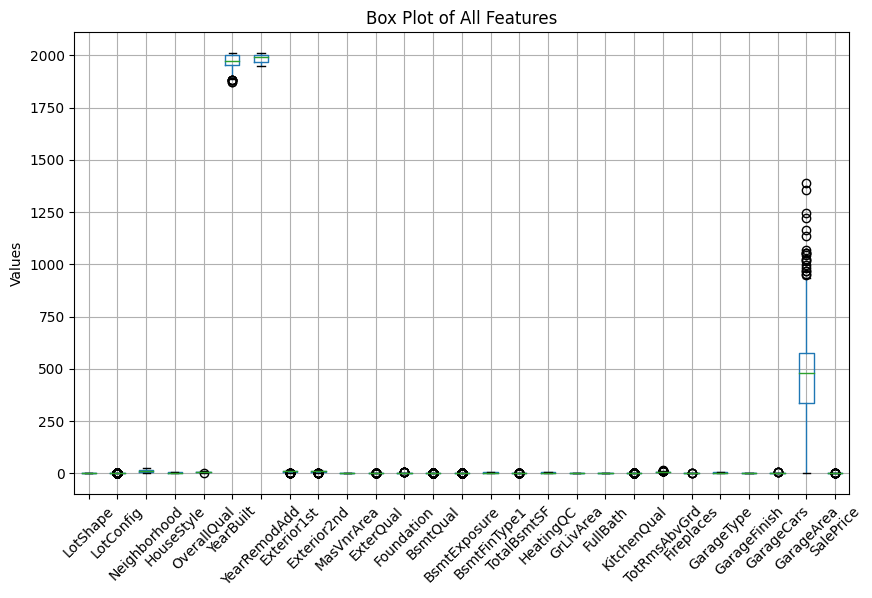

In [90]:
plt.figure(figsize=(10, 6))  
data.boxplot()
plt.title("Box Plot of All Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  
plt.show()

In [19]:
columnsObj = data.select_dtypes(include='object')

label = LabelEncoder()

for col in columnsObj:
    data[col] = label.fit_transform(data[col])

In [20]:
skewness = data.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew())
print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 LotShape       -0.610175
LotConfig      -1.135632
Neighborhood    0.042122
HouseStyle      0.306755
OverallQual     0.216944
YearBuilt      -0.613461
YearRemodAdd   -0.503562
Exterior1st    -0.726314
Exterior2nd    -0.692963
MasVnrArea      2.676412
ExterQual      -1.830265
Foundation      0.091217
BsmtQual       -1.344288
BsmtExposure   -1.189376
BsmtFinType1   -0.061029
TotalBsmtSF     1.524255
HeatingQC       0.483218
GrLivArea       1.366560
FullBath        0.036562
KitchenQual    -1.422808
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageType      0.853020
GarageFinish   -0.440519
GarageCars     -0.342549
GarageArea      0.179981
SalePrice       1.882876
dtype: float64


In [40]:
highly_skewed = [
    "LotConfig", "MasVnrArea", "ExterQual", 
    "BsmtQual", "BsmtExposure", 
    "TotalBsmtSF", "GrLivArea", "KitchenQual",
    "SalePrice"
]

for col in highly_skewed:
    data[col] = np.log1p(data[col])

new_skewness = data[highly_skewed].apply(lambda x: x.skew())
print("Skewness after transformation:\n", new_skewness)


Skewness after transformation:
 LotConfig      -1.408195
MasVnrArea      0.397512
ExterQual      -3.851993
BsmtQual       -2.526131
BsmtExposure   -1.602724
TotalBsmtSF    -6.021913
GrLivArea      -0.190163
KitchenQual    -2.765769
SalePrice      -0.009229
dtype: float64


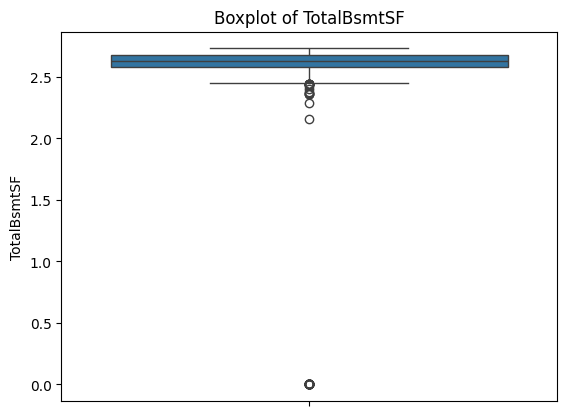

In [37]:
sns.boxplot(y=data['TotalBsmtSF'])
plt.title('Boxplot of TotalBsmtSF')
plt.show()


In [38]:
data['TotalBsmtSF'] = np.sqrt(data['TotalBsmtSF'])


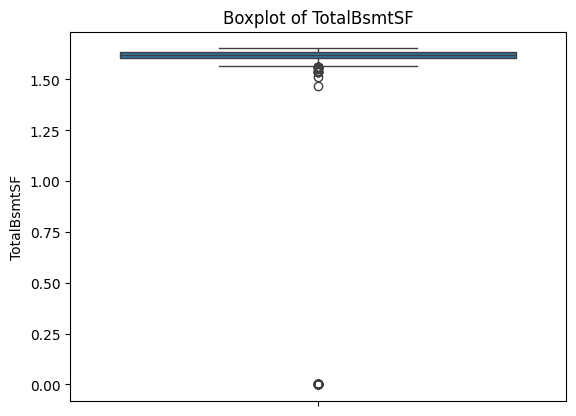

In [39]:
sns.boxplot(y=data['TotalBsmtSF'])
plt.title('Boxplot of TotalBsmtSF')
plt.show()

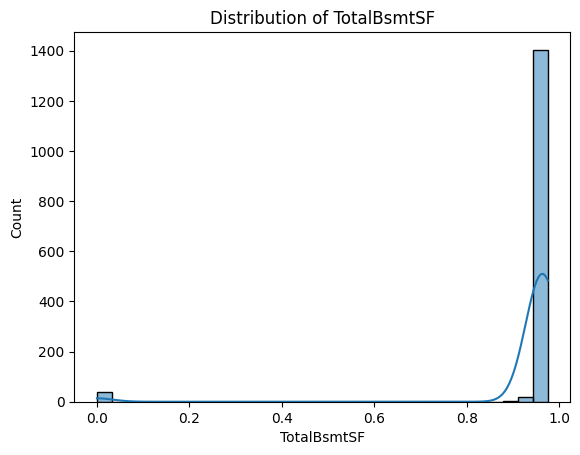

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['TotalBsmtSF'], kde=True, bins=30)
plt.title('Distribution of TotalBsmtSF')
plt.show()

In [42]:
x = data[['GrLivArea']]
y = data['SalePrice']

In [43]:
data['GrLivArea'] = np.log1p(data['GrLivArea'])
data['GrLivArea'].skew()

-0.21157132588802866

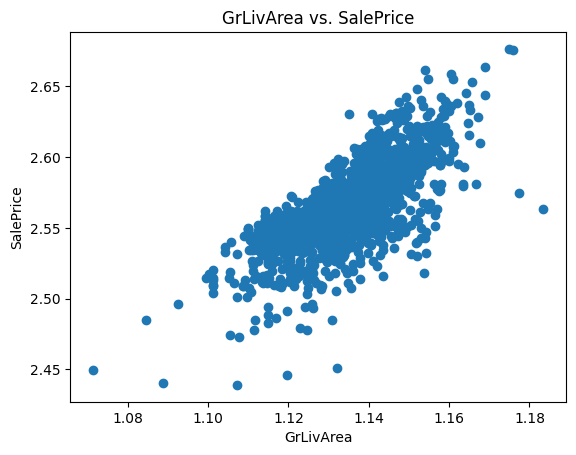

In [44]:
plt.scatter(x, y)
plt.title("GrLivArea vs. SalePrice")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [45]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
y_train = data[['SalePrice']]

x_train_scaled = scaler_x.fit_transform(x)
# x_test_scaled = scaler_x.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train).ravel()

In [76]:
from sklearn.preprocessing import PolynomialFeatures

degree = 1
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(x_train_scaled)

In [47]:
simpleModel = LinearRegression()

simpleModel.fit(X_train_poly,y_train_scaled)
y_train_pred = simpleModel.predict(X_train_poly)


In [48]:
simpleModel.score(X_train_poly,y_train_scaled)

0.532381355941818

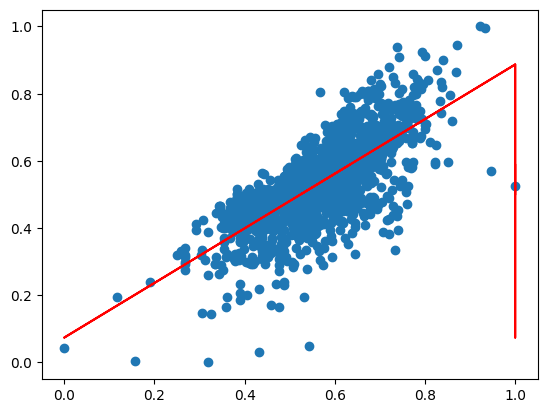

In [49]:
y_pred = simpleModel.predict(X_train_poly)
plt.scatter(x_train_scaled, y_train_scaled)
plt.plot(X_train_poly, y_pred, color='r')

In [67]:
Q1 = data['GrLivArea'].quantile(0.25)
Q3 = data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR
data = data[(data['GrLivArea'] >= lower_threshold) & (data['GrLivArea'] <= upper_threshold)]
xQ = data[['GrLivArea']]

In [68]:
y_train = data[['SalePrice']]
y_train_scaled = scaler_y.fit_transform(y_train).ravel()

In [77]:
x_train_scaled = scaler_x.fit_transform(xQ)

X_train_poly = poly.fit_transform(x_train_scaled)

simpleModelQ = LinearRegression()

simpleModelQ.fit(X_train_poly,y_train_scaled)
y_train_pred = simpleModelQ.predict(X_train_poly)

simpleModelQ.score(X_train_poly,y_train_scaled)

0.5209231763224362

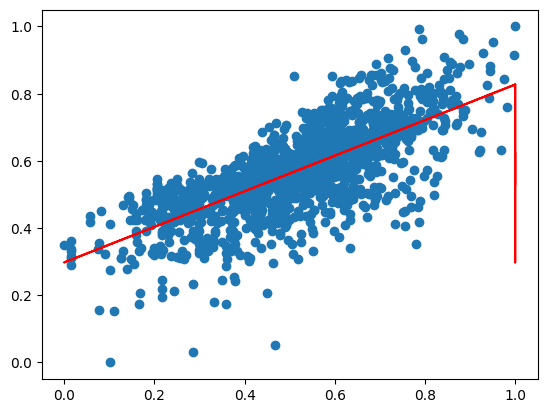

In [78]:
y_pred = simpleModelQ.predict(X_train_poly)
plt.scatter(x_train_scaled, y_train_scaled)
plt.plot(X_train_poly, y_pred, color='r')

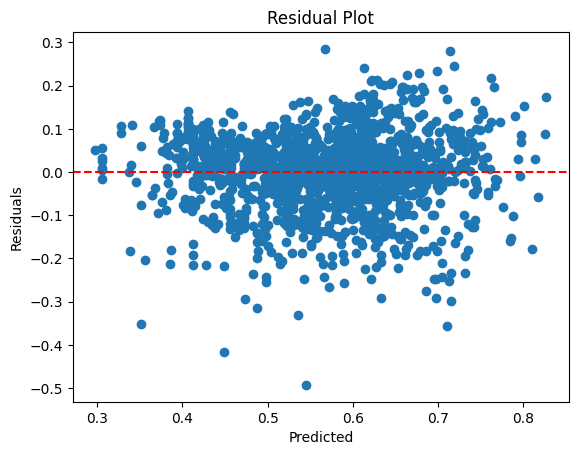

In [81]:
import matplotlib.pyplot as plt

residuals = y_train_scaled - simpleModelQ.predict(X_train_poly)
plt.scatter(simpleModelQ.predict(X_train_poly), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [86]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(simpleModelQ, X_train_poly, y_train_scaled, cv=5, scoring='r2')
scores.mean()

array([0.53070445, 0.59253571, 0.51478697, 0.46790596, 0.46505875])

In [88]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)  
model.fit(X_train_poly, y_train_scaled)

model.score(X_train_poly, y_train_scaled)

0.5207066491990315

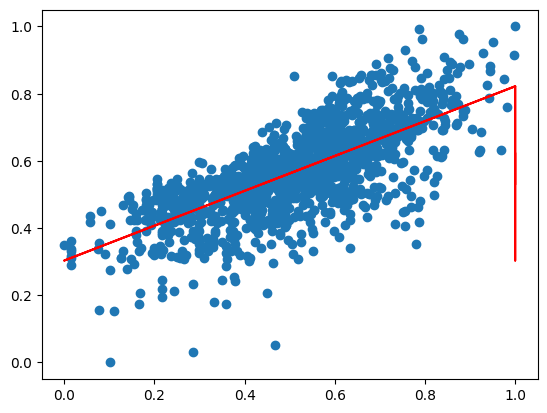

In [91]:
y_pred = model.predict(X_train_poly)
plt.scatter(x_train_scaled, y_train_scaled)
plt.plot(X_train_poly, y_pred, color='r')

In [89]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_poly, y_train_scaled, cv=5, scoring='r2')
scores.mean()

0.5140950203202408